# Dealing with Categorical Variables - Lab

## Introduction
In this lab, you'll explore the Ames Housing dataset for categorical variables, and you'll transform your data so you'll be able to use categorical data as predictors!

## Objectives
You will be able to:
* Determine whether variables are categorical or continuous
* Use one hot encoding to create dummy variables
* Describe why dummy variables are necessary

## Importing the Ames Housing dataset

Let's start by importing the Ames Housing dataset from ``ames.csv`` into a pandas dataframe using pandas ``read_csv()``

In [1]:
# Import your data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('ames.csv')

Now look at the first five rows of `ames`:  

In [2]:
# Inspect the first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**LotArea**: Size of the lot in square feet

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

Let's inspect all features using `.describe()` and `.info()`

In [3]:
# Use .describe()
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Use .info()
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

### Plot Categorical Variables

Now, pick 6 categorical variables and plot them against SalePrice with a bar graph for each variable. All 6 bar graphs should be on the same figure.

In [7]:
cat_df = df[['MSZoning','OverallQual', 'OverallCond', 'KitchenQual','CentralAir','Fireplaces']] # 6 categorical variables
cols = list(cat_df.columns)
cat_df.MSZoning = cat_df.MSZoning.astype('category')
cat_df.KitchenQual = cat_df.KitchenQual.astype('category')
cat_df.CentralAir = cat_df.CentralAir.astype('category')

C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   MSZoning     1460 non-null   category
 1   OverallQual  1460 non-null   int64   
 2   OverallCond  1460 non-null   int64   
 3   KitchenQual  1460 non-null   category
 4   CentralAir   1460 non-null   category
 5   Fireplaces   1460 non-null   int64   
dtypes: category(3), int64(3)
memory usage: 39.1 KB


In [15]:
cat_df['zone_codes'] = cat_df.MSZoning.cat.codes
cat_df['aircon_codes'] =cat_df.CentralAir.cat.codes
cat_df['kitchenqual_codes'] = cat_df.KitchenQual.cat.codes

C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [12]:
cat_df.zone_codes.value_counts()

3    1151
4     218
1      65
2      16
0      10
Name: zone_codes, dtype: int64

C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


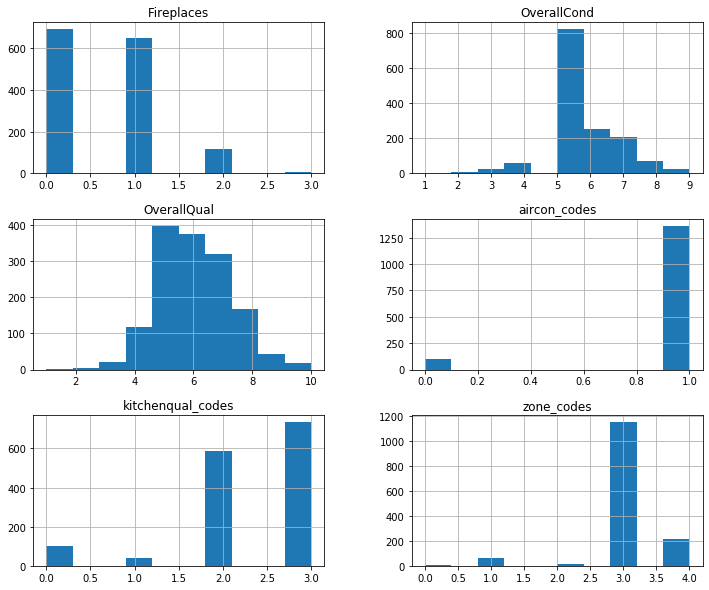

In [20]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
cat_df.hist(ax=ax)
plt.show()

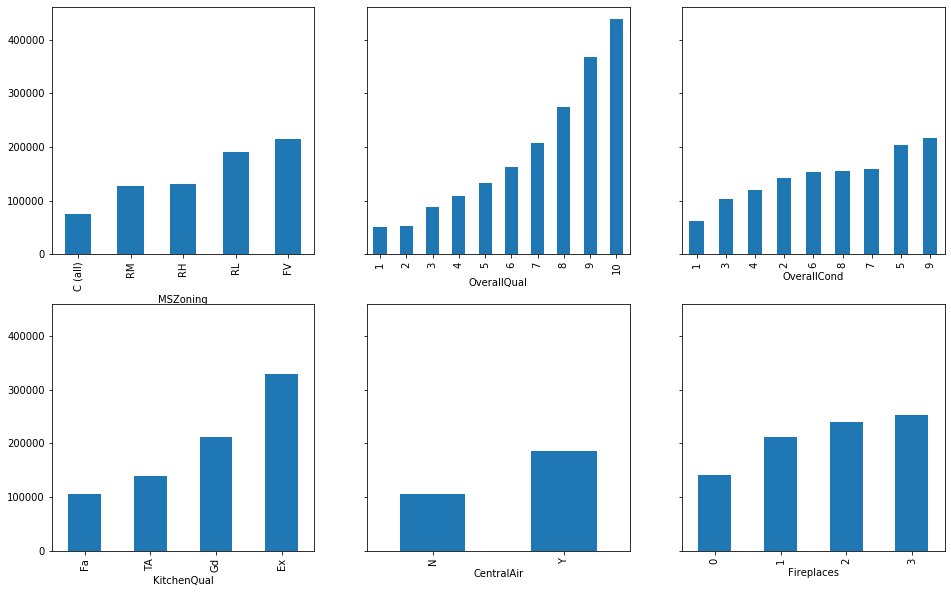

In [23]:
categories = ['MSZoning','OverallQual', 'OverallCond', 'KitchenQual','CentralAir','Fireplaces']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

for col, ax in zip(categories,axes.flatten()):
    df.groupby(col).mean()['SalePrice'].sort_values().plot.bar(ax=ax)

## Create dummy variables

Create dummy variables for the six categorical features you chose remembering to drop the first. Drop the categorical columns that you used, concat the dummy columns to our continuous variables and asign it to a new variable `ames_preprocessed`

In [17]:
# Create dummy variables for your six categorical features
cat_df

,MSZoning,OverallQual,OverallCond,KitchenQual,CentralAir,Fireplaces,zone_codes,aircon_codes,kitchenqual_codes
0,RL,7,5,Gd,Y,0,3,1,2
1,RL,6,8,TA,Y,1,3,1,3
2,RL,7,5,Gd,Y,1,3,1,2
3,RL,7,5,Gd,Y,1,3,1,2
4,RL,8,5,Gd,Y,1,3,1,2
...,...,...,...,...,...,...,...,...,...
1455,RL,6,5,TA,Y,1,3,1,3
1456,RL,6,6,TA,Y,2,3,1,3
1457,RL,7,9,Gd,Y,2,3,1,2
1458,RL,5,6,Gd,Y,0,3,1,2


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing continuous and categorical data. You then created dummy variables using one hot encoding.